In [1]:
import os
import ast
import json
from glob import glob
from collections import Counter
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import networkx as nx
from modules.load_data import load

In [54]:
metadata_core = pd.read_csv('../raw/metadata_kwd_list_vocab7000.csv')
metadata = load('metadata')
metadata_core.columns, metadata_core.shape

In [55]:
metadata.head()

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,post_id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


In [25]:
# 문자열 형태로 저장된 리스트를 리스트로 인식되도록 복구
def str2list(strlist: str) -> list:
    listed = ast.literal_eval(strlist)
    return listed

metadata_core['keyword_list'] = metadata_core['keyword_list'].apply(lambda x: str2list(x))

In [39]:
# 태그별 빈도 파악
def squeeze(arr: list) -> list:
    '''2차원 리스트를 1차원으로 squeeze'''
    result = []
    for l in arr:
        if len(l) > 0 and isinstance(l, list):
            result.extend(l)
        elif not isinstance(l, list):
            result.append(l)
    return result

kwd_counts = pd.Series(squeeze(metadata_core['keyword_list'].tolist())).value_counts()
vocab7000 = kwd_counts.index.tolist() 

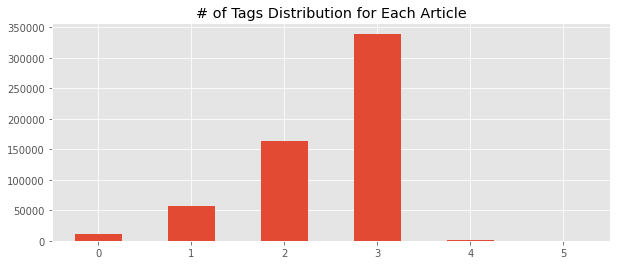

In [58]:

plt.figure(figsize=(10, 4))
metadata_core['keyword_list'].apply(lambda x: len(x)).value_counts(sortFalse).plot(kind='bar', rot=0)
plt.title('# of Tags Distribution for Each Article')
plt.show()

태그 수가 대부분 2~3개
TF-IDF 벡터가 매우 sparse할 것 같다

In [48]:
metadata_core['keyword_list'].apply(lambda x: len(x))

0         3
1         1
2         3
3         3
4         2
         ..
573034    2
573035    2
573036    3
573037    3
573038    3
Name: keyword_list, Length: 573039, dtype: int64

In [40]:
vocab7000

['여행',
 '영화',
 '사랑',
 '에세이',
 '그림일기',
 '생각',
 '공감에세이',
 '일상',
 '글쓰기',
 '감성에세이',
 '인생',
 '행복',
 '연애',
 '소설',
 '드로잉',
 '독서',
 '육아',
 '그림',
 '마음',
 '사진',
 '리뷰',
 '엄마',
 '음악',
 '스타트업',
 '시',
 '유럽여행',
 '일러스트',
 '이별',
 '마케팅',
 '고양이',
 '디자인',
 '영화리뷰',
 '웹툰',
 'IT',
 '직장인',
 '감성',
 '일기',
 '사람',
 '결혼',
 '친구',
 '창업',
 '회사',
 '취업',
 '교육',
 '감성사진',
 '퇴사',
 '일본',
 '건강',
 '세계여행',
 '해외여행',
 '가족',
 '커피',
 '다이어트',
 '성공',
 '시간',
 '직장',
 '음식',
 '운동',
 '책',
 '카페',
 '맛집',
 '문학',
 '관계',
 '가을',
 '미국',
 '심리',
 '기억',
 '영어',
 '일상에세이',
 '중국',
 '철학',
 '아이',
 '제주',
 '직장생활',
 '일본여행',
 '배낭여행',
 '요리',
 '이야기',
 '육아일기',
 '그림에세이',
 '감정',
 '공부',
 '서평',
 '인간관계',
 '자기계발',
 '책리뷰',
 '부동산',
 '추억',
 '제주도',
 '반려동물',
 '강아지',
 '뉴욕',
 '역사',
 '인문학',
 '죽음',
 '작가',
 '예술',
 '위로',
 '겨울',
 '아빠',
 '인터뷰',
 '심리학',
 '브랜드',
 '여행에세이',
 '자존감',
 '프랑스',
 '반려견',
 '꿈',
 '공감',
 '드라마',
 '사회',
 '아버지',
 '습관',
 '노래',
 '바다',
 '필사',
 '유럽',
 '그리움',
 '인도',
 '투자',
 '여름',
 '캘리그라피',
 '파리',
 '감성글',
 '편지',
 '하루',
 '게임',
 '인공지능',
 '고민',
 '만화',
 '패션',
 '브런치북',
 '